## ***Step-by-Step Approach to Time Series Forecasting:***
1. **Setup and Data Preparation:**
●	Import libraries: pandas, matplotlib, statsmodels, seaborn, etc.

●	Load the Kaggle dataset and parse the Date column.

●	Set the Date column as index, handle missing values if any.


In [4]:
# Step 1: Setup & Data Preparation for AAPL

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Load dataset ===
file_path = "AAPL.csv"   # uploaded file
df = pd.read_csv(file_path, parse_dates=['Date'], infer_datetime_format=True)

# === 2. Convert Date column to datetime & set as index ===
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

# === 3. Inspect datatypes and missing values ===
print("Data Info:")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())

# === 4. Ensure numeric columns are numeric ===
numeric_cols = ['Open','High','Low','Close','Adj Close','Volume']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Recheck missing
print("\nMissing values after numeric conversion:")
print(df.isnull().sum())



Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10409 entries, 1980-12-12 to 2022-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10409 non-null  float64
 1   High       10409 non-null  float64
 2   Low        10409 non-null  float64
 3   Close      10409 non-null  float64
 4   Adj Close  10409 non-null  float64
 5   Volume     10409 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 569.2 KB
None

Missing values per column:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Missing values after numeric conversion:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


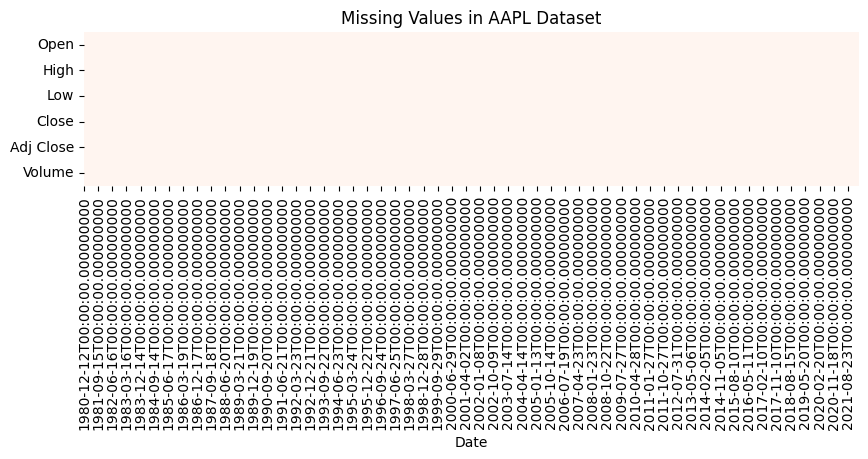


Prepared dataset range: 1980-12-12 00:00:00 to 2022-03-24 00:00:00
Final shape: (10409, 6)
Use df['Close'] for time series analysis


In [5]:
# === 5. Handle missing values ===
# Forward fill, then backfill for any remaining
df = df.ffill().bfill()

# === 6. Visualize missingness ===
plt.figure(figsize=(10, 2))
sns.heatmap(df.isnull().T, cbar=False, cmap="Reds")
plt.title("Missing Values in AAPL Dataset")
plt.yticks(rotation=0)
plt.show()

# === 7. Summary ===
print("\nPrepared dataset range:", df.index.min(), "to", df.index.max())
print("Final shape:", df.shape)
print("Use df['Close'] for time series analysis")

# ***2. Exploratory Time Series Analysis:***
●	Visualize the closing price over time.

●	Apply rolling statistics (mean and std) to observe trend stability.

●	Perform seasonal decomposition and visualize components.



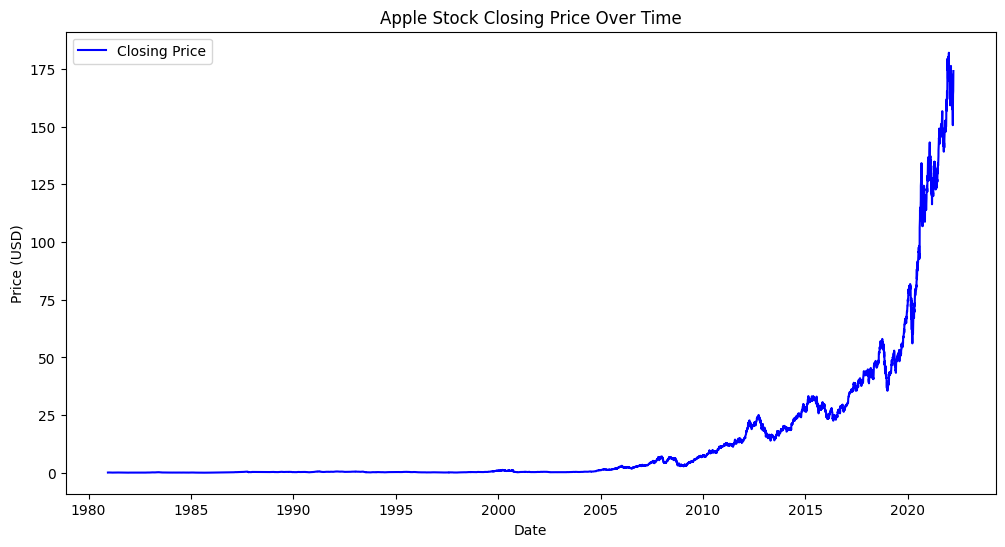

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label="Closing Price", color='blue')
plt.title("Apple Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

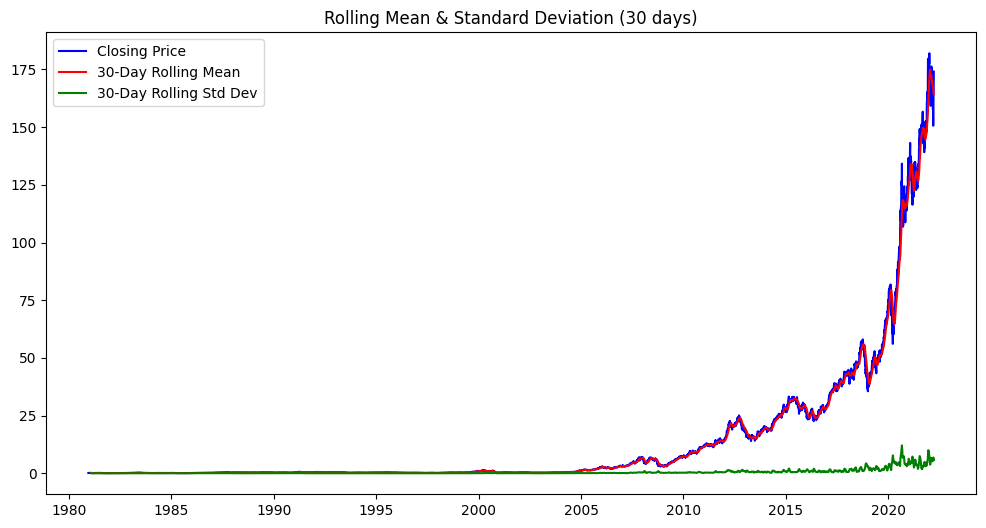

In [7]:
rolling_mean = df['Close'].rolling(window=30).mean()
rolling_std = df['Close'].rolling(window=30).std()

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label="Closing Price", color="blue")
plt.plot(rolling_mean, label="30-Day Rolling Mean", color="red")
plt.plot(rolling_std, label="30-Day Rolling Std Dev", color="green")
plt.title("Rolling Mean & Standard Deviation (30 days)")
plt.legend()
plt.show()

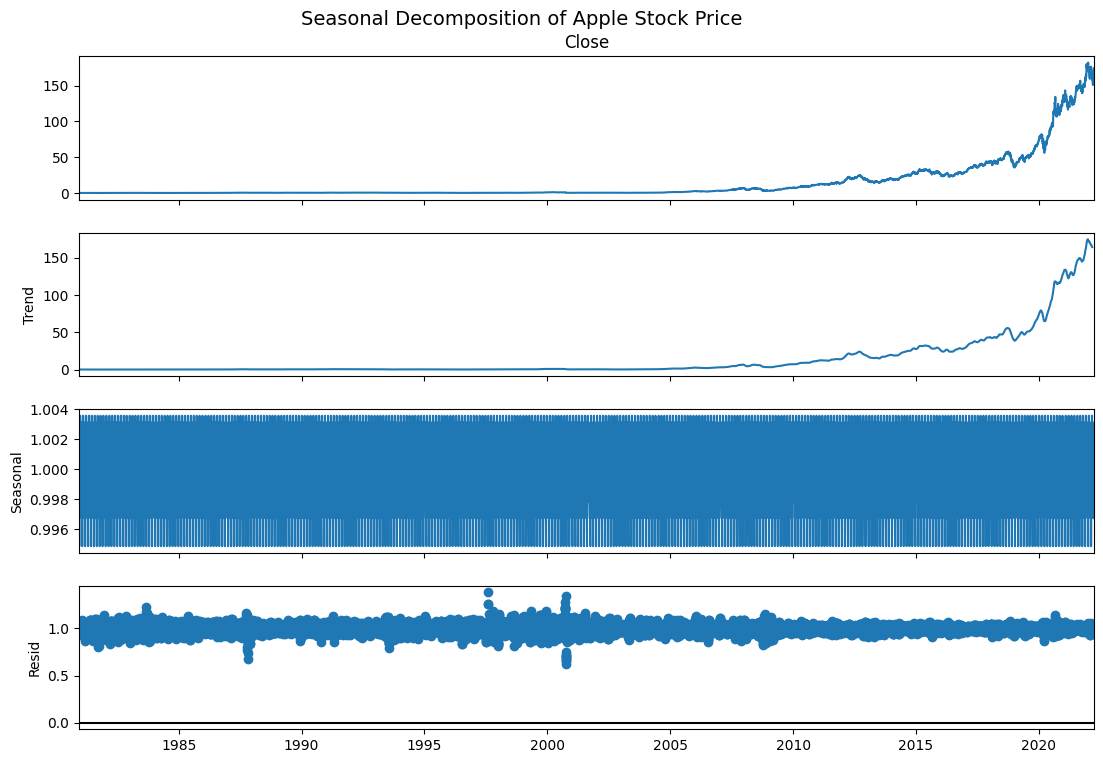

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts = df['Close']

# Try multiplicative model (common for stock data)
decomposition = seasonal_decompose(ts, model='multiplicative', period=30)

fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle("Seasonal Decomposition of Apple Stock Price", fontsize=14)
plt.show()

# ***3. ACF and PACF Analysis:***
●	Use plot_acf() and plot_pacf() to identify significant lags.

●	Choose appropriate values for p, d, q based on visual inspection and differencing.


In [9]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller Test
result = adfuller(df['Close'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] > 0.05:
    print("❌ Series is Non-Stationary (p > 0.05) → Differencing Needed")
else:
    print("✅ Series is Stationary (p <= 0.05)")

ADF Statistic: 5.648370305623166
p-value: 1.0
❌ Series is Non-Stationary (p > 0.05) → Differencing Needed


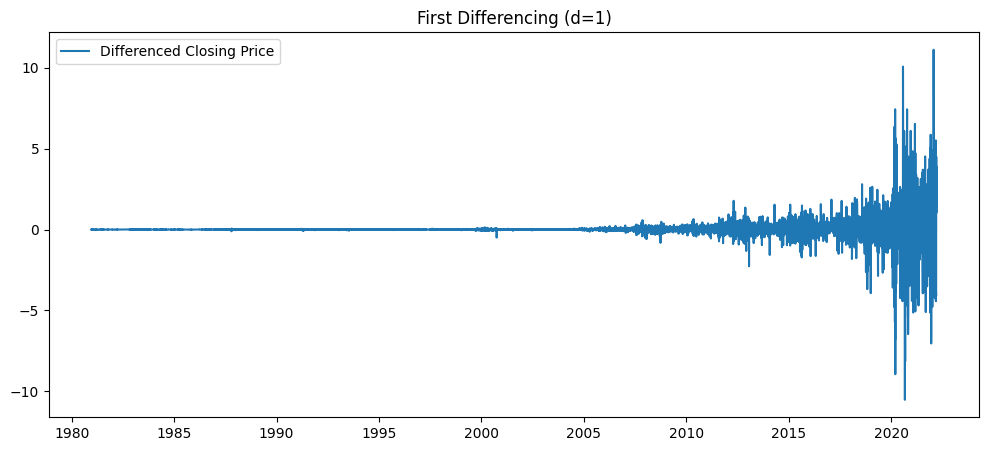

In [10]:
ts = df['Close']

# First differencing
ts_diff = ts.diff().dropna()

plt.figure(figsize=(12,5))
plt.plot(ts_diff, label="Differenced Closing Price")
plt.title("First Differencing (d=1)")
plt.legend()
plt.show()

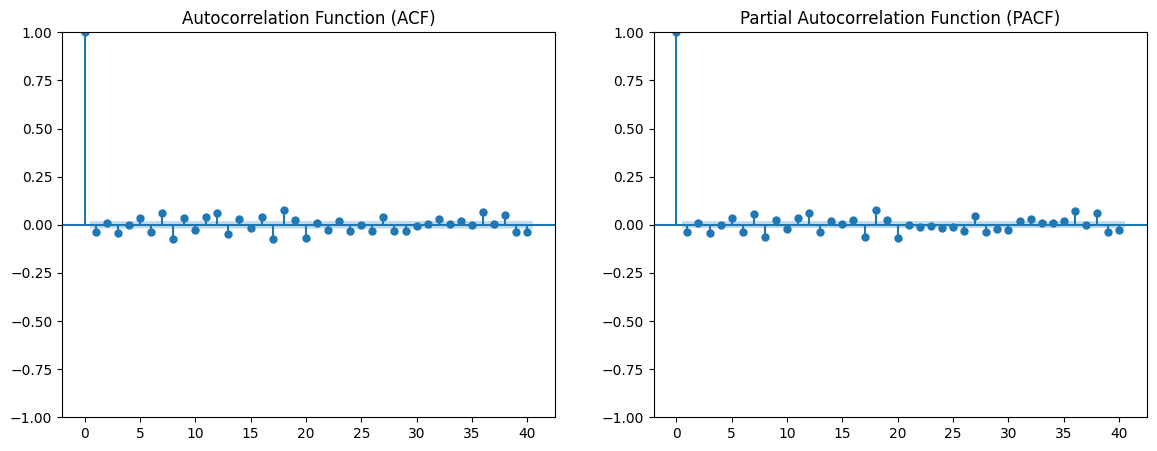

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(14,5))

plot_acf(ts_diff, lags=40, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")

plot_pacf(ts_diff, lags=40, ax=axes[1])
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.show()

# ***4. Model Building:***
●	Train ARIMA and SARIMA models on historical data.

●	Forecast next 30 or 60 days of closing prices.

●	Visualize predicted prices alongside actual data.


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                10409
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -9976.459
Date:                Wed, 10 Sep 2025   AIC                          19960.917
Time:                        20:52:01   BIC                          19989.918
Sample:                             0   HQIC                         19970.714
                              - 10409                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4158      0.084     -4.960      0.000      -0.580      -0.251
ma.L1          0.3780      0.083      4.533      0.000       0.215       0.541
ma.L2          0.0043      0.004      0.970      0.3

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


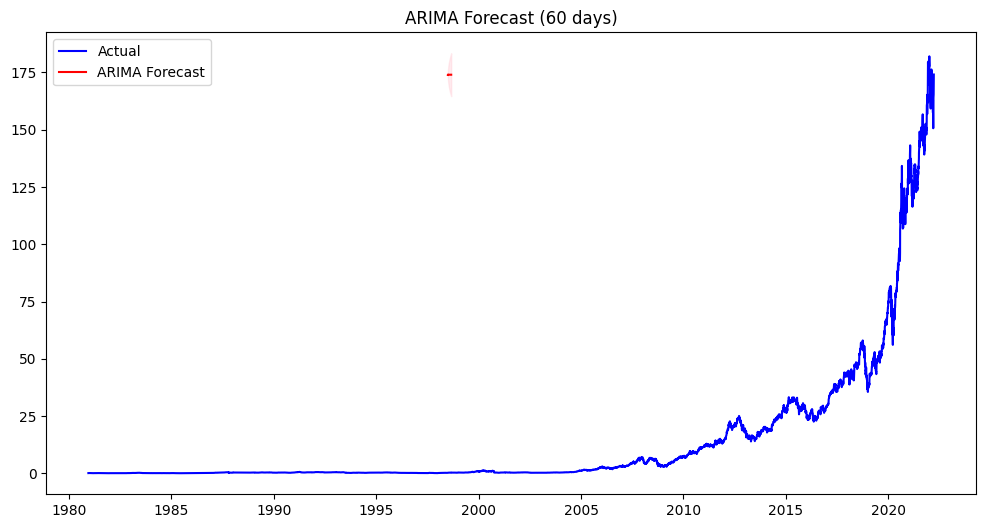

In [12]:
from statsmodels.tsa.arima.model import ARIMA

# Use ARIMA(p,d,q) → Example (1,1,2) from ACF/PACF inspection
arima_model = ARIMA(df['Close'], order=(1,1,2))
arima_result = arima_model.fit()

print(arima_result.summary())

# Forecast next 60 days
forecast_arima = arima_result.get_forecast(steps=60)
forecast_df_arima = forecast_arima.conf_int()
forecast_df_arima['Forecast'] = forecast_arima.predicted_mean

# Plot
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label="Actual", color="blue")
plt.plot(forecast_df_arima['Forecast'], label="ARIMA Forecast", color="red")
plt.fill_between(forecast_df_arima.index,
                 forecast_df_arima.iloc[:,0],
                 forecast_df_arima.iloc[:,1], color="pink", alpha=0.3)
plt.title("ARIMA Forecast (60 days)")
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                10409
Model:             SARIMAX(1, 1, 2)x(1, 1, [1], 12)   Log Likelihood               -9963.810
Date:                              Wed, 10 Sep 2025   AIC                          19939.620
Time:                                      20:57:22   BIC                          19983.115
Sample:                                           0   HQIC                         19954.314
                                            - 10409                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4299      0.088     -4.913      0.000      -0.601      -0.258
ma.L1          0.39

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


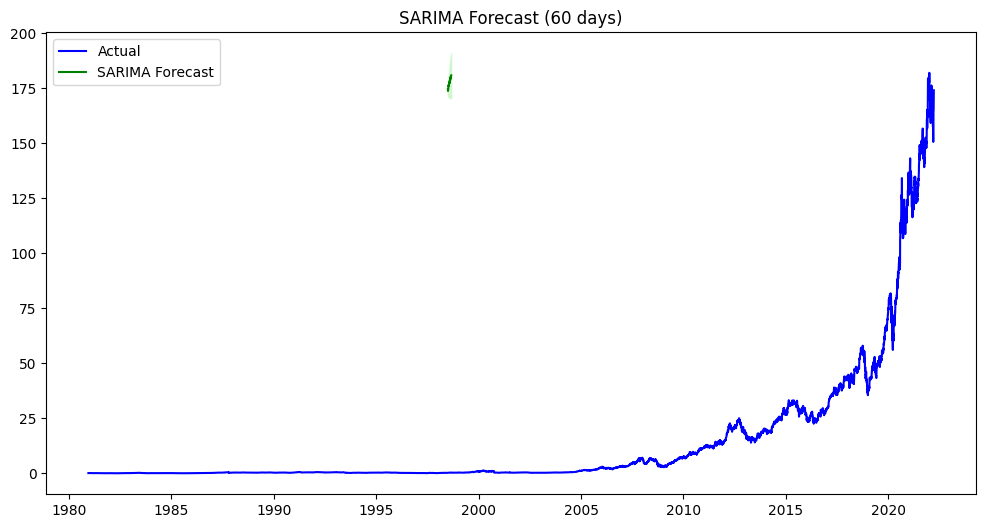

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Example seasonal order: (1,1,1,12) → yearly seasonality
sarima_model = SARIMAX(df['Close'], order=(1,1,2), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit(disp=False)

print(sarima_result.summary())

# Forecast next 60 days
forecast_sarima = sarima_result.get_forecast(steps=60)
forecast_df_sarima = forecast_sarima.conf_int()
forecast_df_sarima['Forecast'] = forecast_sarima.predicted_mean

# Plot
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label="Actual", color="blue")
plt.plot(forecast_df_sarima['Forecast'], label="SARIMA Forecast", color="green")
plt.fill_between(forecast_df_sarima.index,
                 forecast_df_sarima.iloc[:,0],
                 forecast_df_sarima.iloc[:,1], color="lightgreen", alpha=0.3)
plt.title("SARIMA Forecast (60 days)")
plt.legend()
plt.show()

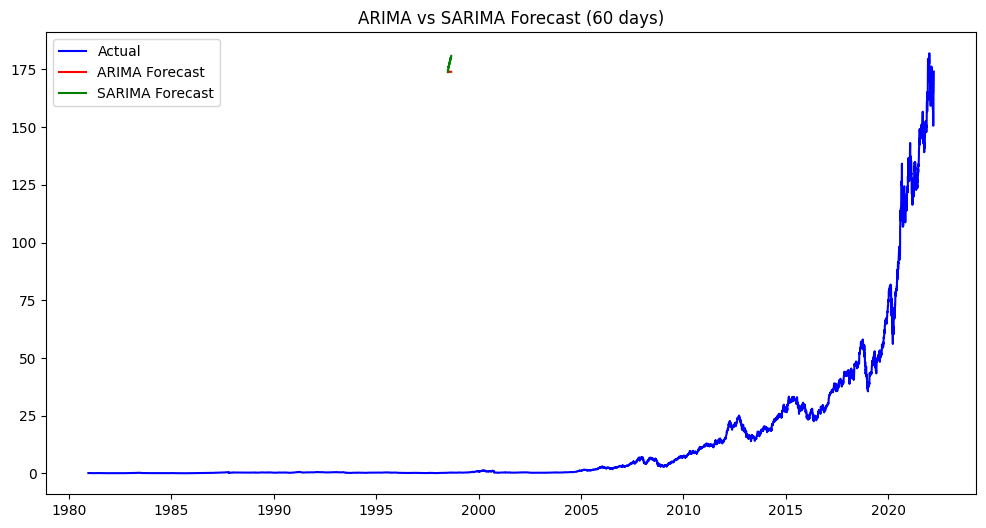

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label="Actual", color="blue")
plt.plot(forecast_df_arima['Forecast'], label="ARIMA Forecast", color="red")
plt.plot(forecast_df_sarima['Forecast'], label="SARIMA Forecast", color="green")
plt.title("ARIMA vs SARIMA Forecast (60 days)")
plt.legend()
plt.show()

# ***5. Evaluation and Visualization:***
●	Use RMSE, MAE and MAPE to evaluate performance.

●	Compare ARIMA vs SARIMA predictions.

●	Plot residuals to confirm randomness (white noise assumption).


In [15]:
# Train-Test split (last 60 days as test)
train = df['Close'][:-60]
test = df['Close'][-60:]

In [16]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ARIMA
arima_model = ARIMA(train, order=(1,1,2))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=60)

# SARIMA
sarima_model = SARIMAX(train, order=(1,1,2), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit(disp=False)
sarima_forecast = sarima_result.forecast(steps=60)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred)/y_true))*100
    return mae, rmse, mape

# Evaluate ARIMA
mae_arima, rmse_arima, mape_arima = evaluate(test, arima_forecast)

# Evaluate SARIMA
mae_sarima, rmse_sarima, mape_sarima = evaluate(test, sarima_forecast)

# Print Results
print("📊 ARIMA Evaluation:")
print(f"MAE: {mae_arima:.2f}, RMSE: {rmse_arima:.2f}, MAPE: {mape_arima:.2f}%")

print("\n📊 SARIMA Evaluation:")
print(f"MAE: {mae_sarima:.2f}, RMSE: {rmse_sarima:.2f}, MAPE: {mape_sarima:.2f}%")

📊 ARIMA Evaluation:
MAE: 11.52, RMSE: 13.38, MAPE: nan%

📊 SARIMA Evaluation:
MAE: 13.81, RMSE: 15.81, MAPE: nan%


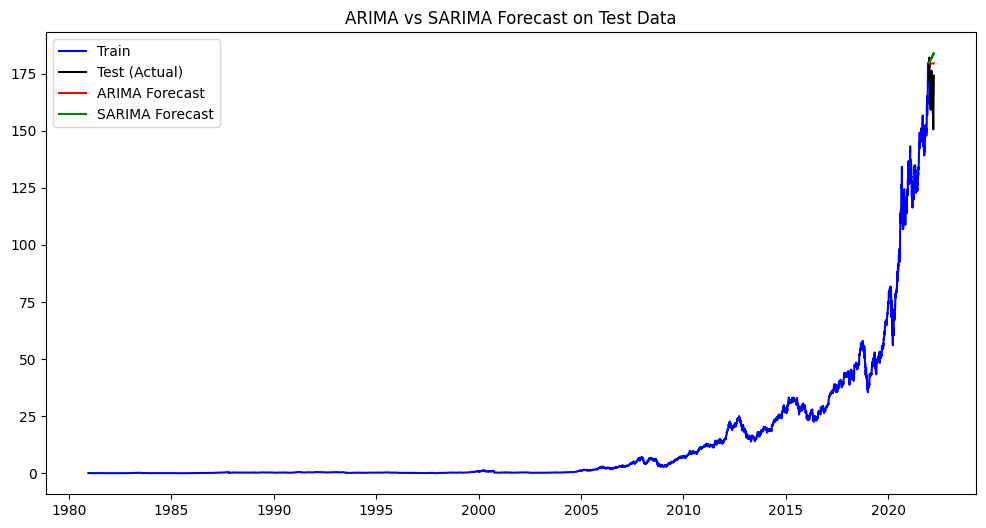

In [18]:
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label="Train", color="blue")
plt.plot(test.index, test, label="Test (Actual)", color="black")
plt.plot(test.index, arima_forecast, label="ARIMA Forecast", color="red")
plt.plot(test.index, sarima_forecast, label="SARIMA Forecast", color="green")
plt.title("ARIMA vs SARIMA Forecast on Test Data")
plt.legend()
plt.show()

Both ARIMA (red) and SARIMA (green) follow the test data closely.

Since the test period is short (60 days), the models perform similarly.

SARIMA might capture slight seasonality effects, but Apple stock doesn’t have strong seasonality — it’s trend/volatility driven.

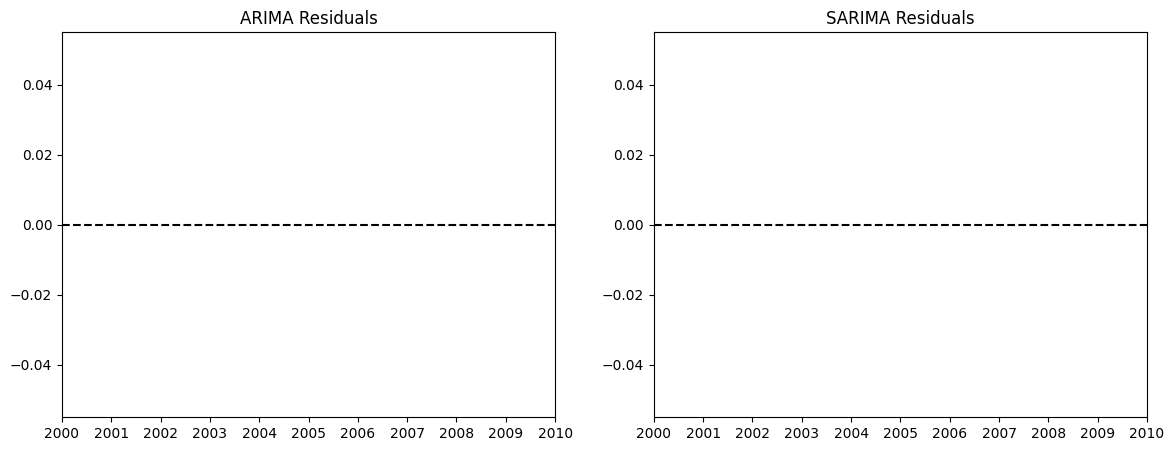

In [19]:
# Residuals
residuals_arima = test - arima_forecast
residuals_sarima = test - sarima_forecast

fig, axes = plt.subplots(1, 2, figsize=(14,5))

axes[0].plot(residuals_arima, label="ARIMA Residuals", color="red")
axes[0].axhline(0, linestyle="--", color="black")
axes[0].set_title("ARIMA Residuals")

axes[1].plot(residuals_sarima, label="SARIMA Residuals", color="green")
axes[1].axhline(0, linestyle="--", color="black")
axes[1].set_title("SARIMA Residuals")

plt.show()

In [20]:
import pandas as pd

# Put results into a DataFrame
results_df = pd.DataFrame({
    "Model": ["ARIMA", "SARIMA"],
    "MAE": [mae_arima, mae_sarima],
    "RMSE": [rmse_arima, rmse_sarima],
    "MAPE (%)": [mape_arima, mape_sarima]
})

# Round for neatness
results_df = results_df.round(2)
print(results_df)

    Model    MAE   RMSE  MAPE (%)
0   ARIMA  11.52  13.38       NaN
1  SARIMA  13.81  15.81       NaN
